In [6]:
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import statistics
import numpy as np
import sys
import random
from scipy.optimize import curve_fit
import pickle
import glob
sys.path.insert(0, "../kitti/")
from util_kitti import kitti_calib_file_parser, kitti_label_file_parser, init_img_plt_without_bev, gac_original_anchor_parser, init_zy_plt, load_tf_image
import os
import cv2

img_tf = load_tf_image("/home/lab530/KenYu/kitti/training/image_2/000169.png")

LABEL_DIR = "/home/lab530/KenYu/kitti/training/label_2/"
CAR_DIR   = "/home/lab530/KenYu/kitti/training/calib/"

labels = []
for fn in glob.glob(LABEL_DIR + "*.txt"):
    # kitti_calib_file_parser(calib_file_path, new_shape_tf = None, crop_tf = 0)
    P2 = kitti_calib_file_parser( fn.replace("label_2", "calib"), new_shape_tf = (288, 1280), crop_tf = 100)

    for label in kitti_label_file_parser(fn, P2):
        # filter labal via gac_original's critiria
        # if label.occluded >= 2 or label.z3d <= 3 or label.category != "Car":
        #     continue
        # else:
        if label.category == "Car":
            labels.append(label)

print(f"Number of total ground trues = {len(labels)}")
print("=====================================")

Number of total ground trues = 28742


# Show Object Center in Image plain

[<AxesSubplot:title={'center':'All Groundtrues'}>]

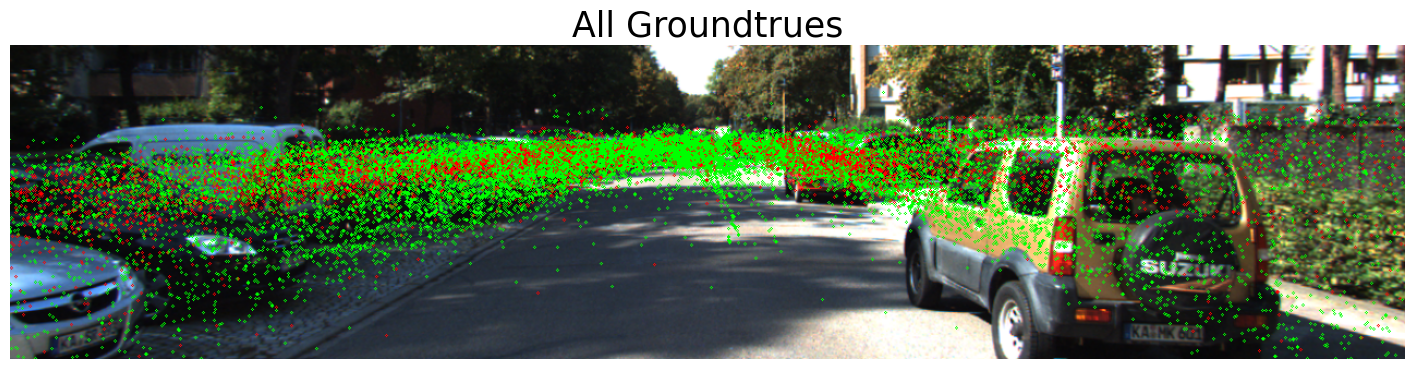

In [10]:
for label in labels:
    x1 = label.corner_2D[0].min()
    y1 = label.corner_2D[1].min()
    x2 = label.corner_2D[0].max()
    y2 = label.corner_2D[1].max()

    x_center = int( (x2 + x1)/2 )
    y_center = int( (y2 + y1)/2 )
    
    if label.occluded >= 2 or label.z3d <= 3:
        cv2.circle(img_tf, (x_center, y_center), 1, (0,0,255), 1)
        
    else:# Filtered object
        cv2.circle(img_tf, (x_center, y_center), 1, (0,255,0), 1)
        

init_img_plt_without_bev([img_tf], ["All Groundtrues", ""])


# Show anchor assignment result on Image

In [ ]:
anchor = np.load("/home/lab530/KenYu/visualDet3D/anchor/max_occlusion_999_anchor.pkl", allow_pickle=True)['anchors']
print(f"anchor = {anchor.shape}")